In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
#loading dataset
df=pd.read_csv('economic_index.csv')
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [130]:
#dropping irrelevent feature
df.drop(['Unnamed: 0','year','month'],inplace=True,axis=1)
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [131]:
#checking Null
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [132]:
#some visualization
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


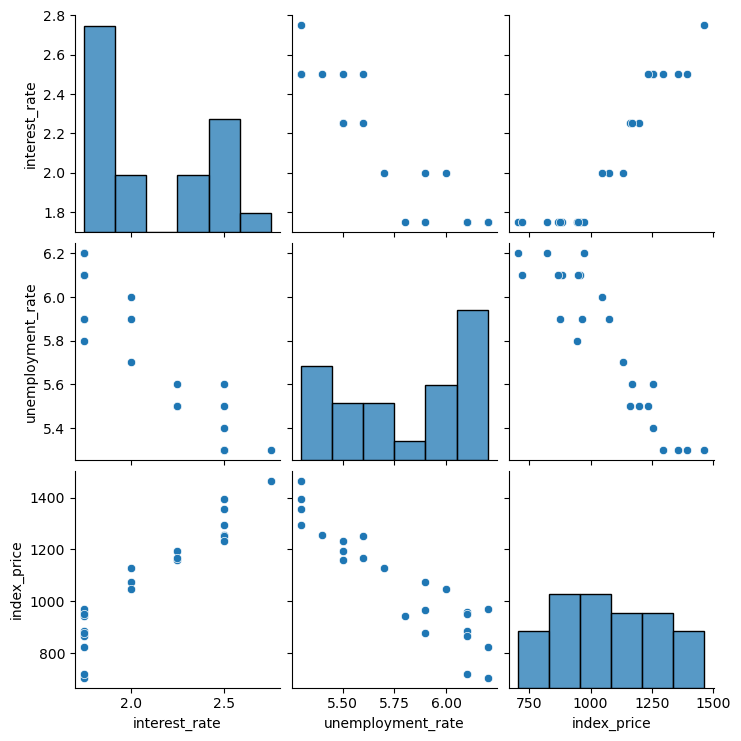

In [133]:
sns.pairplot(df)

Text(0.5, 0, 'unemployment rate ')

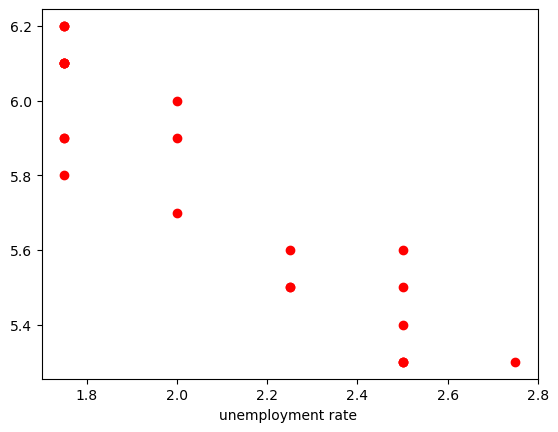

In [134]:
plt.scatter(df['interest_rate'],df['unemployment_rate'],color='r')
plt.xlabel('Interest Rate')
plt.xlabel('unemployment rate ')

In [135]:
#inidependent and Depenedent feature
x=df.iloc[:,:-1]
y=df.iloc[: ,-1]

In [136]:

x.shape

(24, 2)

In [137]:
y.shape

(24,)

In [138]:
#didviding into train test split
from sklearn .model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
x_train.shape

(18, 2)

Text(0, 0.5, 'Index rate')

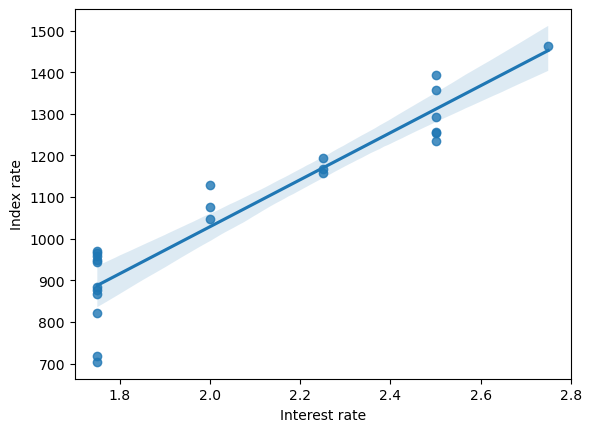

In [139]:
sns.regplot(x=df['interest_rate'],y=df['index_price'])
plt.xlabel('Interest rate')
plt.ylabel('Index rate')

Text(0, 0.5, 'Index rate')

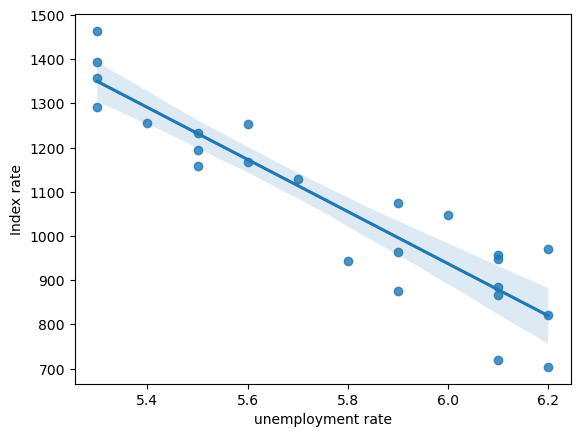

In [140]:
sns.regplot(x=df['unemployment_rate'],y=df['index_price'])
plt.xlabel('unemployment rate')
plt.ylabel('Index rate')

Text(0, 0.5, 'unemeployment rate')

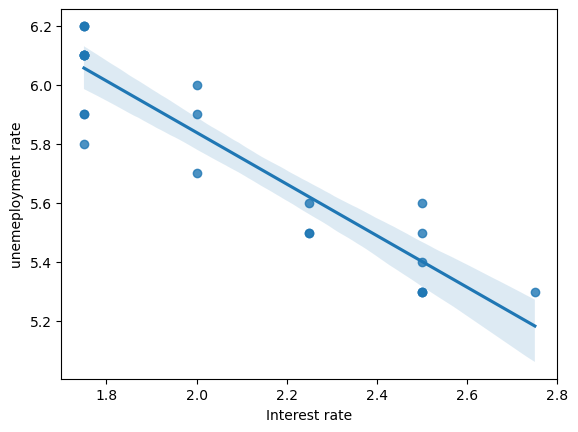

In [141]:
sns.regplot(x=df['interest_rate'],y=df['unemployment_rate'])
plt.xlabel('Interest rate')
plt.ylabel('unemeployment rate')

In [153]:
#satandardization

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
x_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

## How to avoid data leakage
Below are some tips on avoiding data leakage:

Always split the data into train and test subsets first, particularly before any preprocessing steps.

Never include test data when using the fit and fit_transform methods. Using all the data, e.g., fit(X), can result in overly optimistic scores.

Conversely, the transform method should be used on both train and test subsets as the same preprocessing should be applied to all the data. This can be achieved by using fit_transform on the train subset and transform on the test subset.

In [157]:
#just to verify mean and std. deviation

# mean_after_scaling = np.mean(x_train,axis=0)  # Mean of each feature after scaling
# std_after_scaling = np.std(x_train, axis=0)    # Standard deviation of each feature after scaling
# mean_after_scaling = np.round(mean_after_scaling, 6)
# print("Mean of features after scaling:", mean_after_scaling)
# print("Standard deviation of features after scaling:", std_after_scaling)

Mean of features after scaling: [-0. -0.]
Standard deviation of features after scaling: [1. 1.]


In [158]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(x_train,y_train)




LinearRegression()

In [172]:
#cross validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,x_train,y_train,scoring='neg_mean_squared_error',cv=3)
validation_score


array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [173]:
validation_score.mean()

-5914.828180162389

In [176]:
#prediction
y_pred=regression.predict(x_test)
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [185]:
#performance matrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=root_mean_squared_error(y_test,y_pred)
print("mean sqaure error",mse)
print("mean absolute error",mae)
print("root mean sqaure error",rmse)

mean sqaure error 8108.567426306604
mean absolute error 73.80444932337097
root mean sqaure error 90.04758423359621


In [186]:
#rSquare
from sklearn.metrics import r2_score
rSquare=r2_score(y_test,y_pred)
rSquare


0.7591371539010257

In [193]:
#adjusted rSquare
adRSquare=1-((1-rSquare)*(len(y_test)-1))/(len(y_test)-x_test.shape[1]-1)
adRSquare

0.5985619231683761

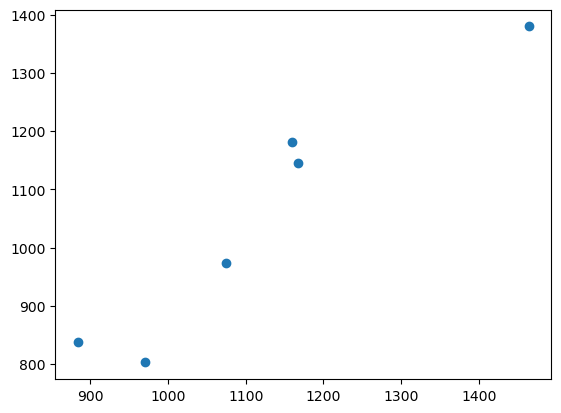

In [194]:
#ploting Y_test and y_predicted
plt.scatter(y_test,y_pred)

In [200]:
residuals=y_pred-y_test
residuals


8      21.746681
16   -168.257203
0     -84.165430
18    -45.474004
11   -101.146860
9     -22.036518
Name: index_price, dtype: float64

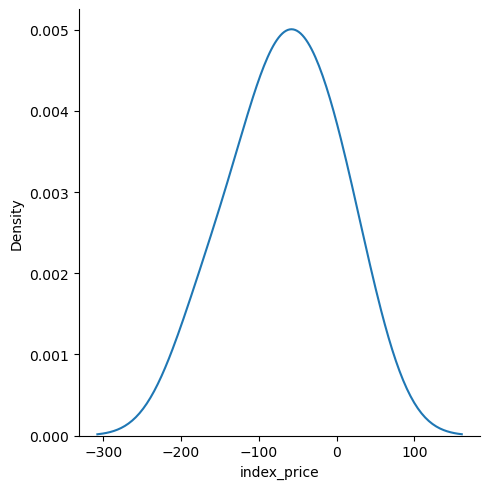

In [202]:
#plot the residuals
sns.displot(residuals,kind='kde')

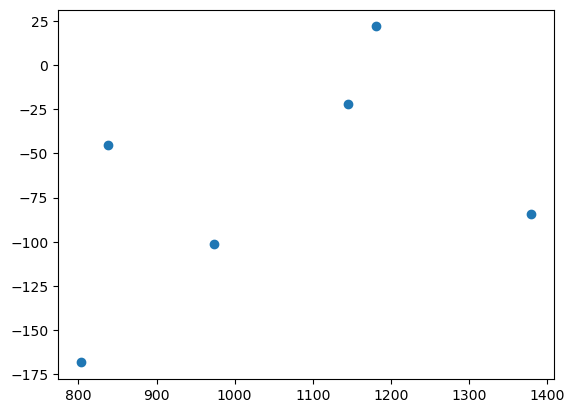

In [203]:
# scatter plot wrt prediction and residuals
plt.scatter(y_pred,residuals) 

since the points are scattered so model is good

In [210]:
import statsmodels.api as sm 
model=sm.OLS(y_train,x_train).fit()
model.predict(x_test)


array([ 127.30223686, -250.70164745,  326.390126  , -214.91844842,
        -79.59130481,   91.51903783])

In [211]:
model.summary()

c:\Users\Lenovo\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Mon, 06 Jan 2025   Prob (F-statistic):                       0.754
Time:                        18:51:55   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [212]:
regression.coef_

array([  88.27275507, -116.25716066])

In [214]:
regression.intercept_

1053.4444444444443